# Feature Creation Climate Forecast

This is a contiunation after ETL. I will load the data stored in the ETl session and generate features. During ETL following observation have been made:
* The temperature values seems to be quite similar. I should check, if there is a high correlation among them
* Vapor pressure and temperature seem to correlate, too.
* There seems to be also a correlation between air pressure and relative humidity, which is interesting considering, that rel. humid is a function of air temperature

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 

In [2]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/Climate_day_train.csv

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [3]:
df=pd.read_csv('Climate_day_train.csv')

In [4]:
df.head()

Unnamed: 0        Date  Qual_wind  Wind_max  Wind_avg  Qual_precep  \
0       14245  1991-01-01         10      11.5       4.5           10   
1       14246  1991-01-02         10      22.0       9.2           10   
2       14247  1991-01-03         10      23.0       5.3           10   
3       14248  1991-01-04         10      15.7       6.2           10   
4       14249  1991-01-05         10      17.8       7.7           10   

   Precepitation  Type_of_Precipitation  sunshine_hours  snow_height  \
0            7.1                      6             3.7            0   
1            3.8                      6             0.0            0   
2            9.2                      6             0.0            0   
3            0.4                      6             4.1            0   
4            2.9                      6             1.1            0   

   Coverage_avg  Vapour_p_avg  Air_p_avg  Temp_avg  Rel_Humid_avg  \
0           4.7           7.0     1010.8       4.8           82.0   
1           7.3          10.7      996.7      11.4           81.0   
2           7.3           9.6     1001.9       8.6           85.0   
3           6.3           7.9     1003.5       6.8           79.0   
4           5.3           7.1     1000.4       6.6           74.0   

   Temp_max_2m  Temp_min_2m  Temp_min_gnd  
0          6.8          2.4           1.1  
1         12.9          5.0           3.7  
2         13.1          7.8           7.6  
3          9.6          5.6           5.6  
4          7.6          3.9           3.1

In [5]:
df.tail()

Unnamed: 0        Date  Qual_wind  Wind_max  Wind_avg  Qual_precep  \
11217       25563  2021-12-27          3      10.8       5.9            3   
11218       25564  2021-12-28          3      16.8       5.8            3   
11219       25565  2021-12-29          3      10.5       5.2            3   
11220       25566  2021-12-30          3      14.1       6.5            3   
11221       25567  2021-12-31          3      12.0       5.7            3   

       Precepitation  Type_of_Precipitation  sunshine_hours  snow_height  \
11217            1.0                      6           1.267            0   
11218           14.9                      6           0.100            0   
11219            6.2                      6           0.183            0   
11220            0.1                      6           0.000            0   
11221            0.0                      6           1.433            0   

       Coverage_avg  Vapour_p_avg  Air_p_avg  Temp_avg  Rel_Humid_avg  \
11217           7.0           8.9     995.08       6.5          92.00   
11218           7.1          10.4     989.38       8.7          92.58   
11219           7.8          11.3    1001.27       9.7          93.67   
11220           7.6          14.2    1010.73      13.6          90.83   
11221           6.9          12.6    1014.87      13.3          81.92   

       Temp_max_2m  Temp_min_2m  Temp_min_gnd  
11217          8.4          3.7           3.4  
11218         10.8          6.6           6.1  
11219         13.1          8.4           7.9  
11220         15.2         11.5          10.7  
11221         14.7         11.9          10.5

In [6]:
df.drop(columns ='Unnamed: 0', inplace = True)
corr = df.corr()
corr.style.background_gradient(cmap='jet')

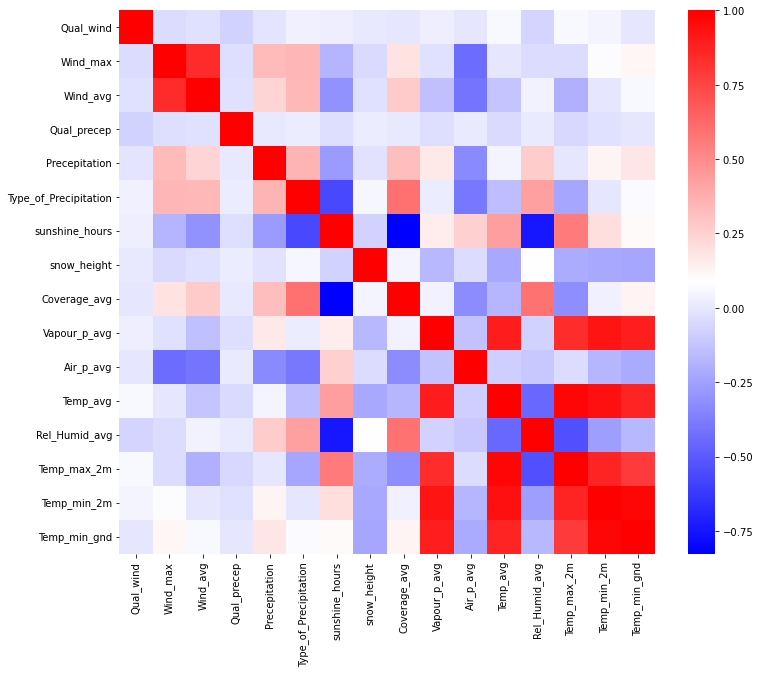

In [7]:
plt.figure(figsize=(12,10))
corr_graph = sns.heatmap(df.corr(), cmap = 'bwr')
plt.show()

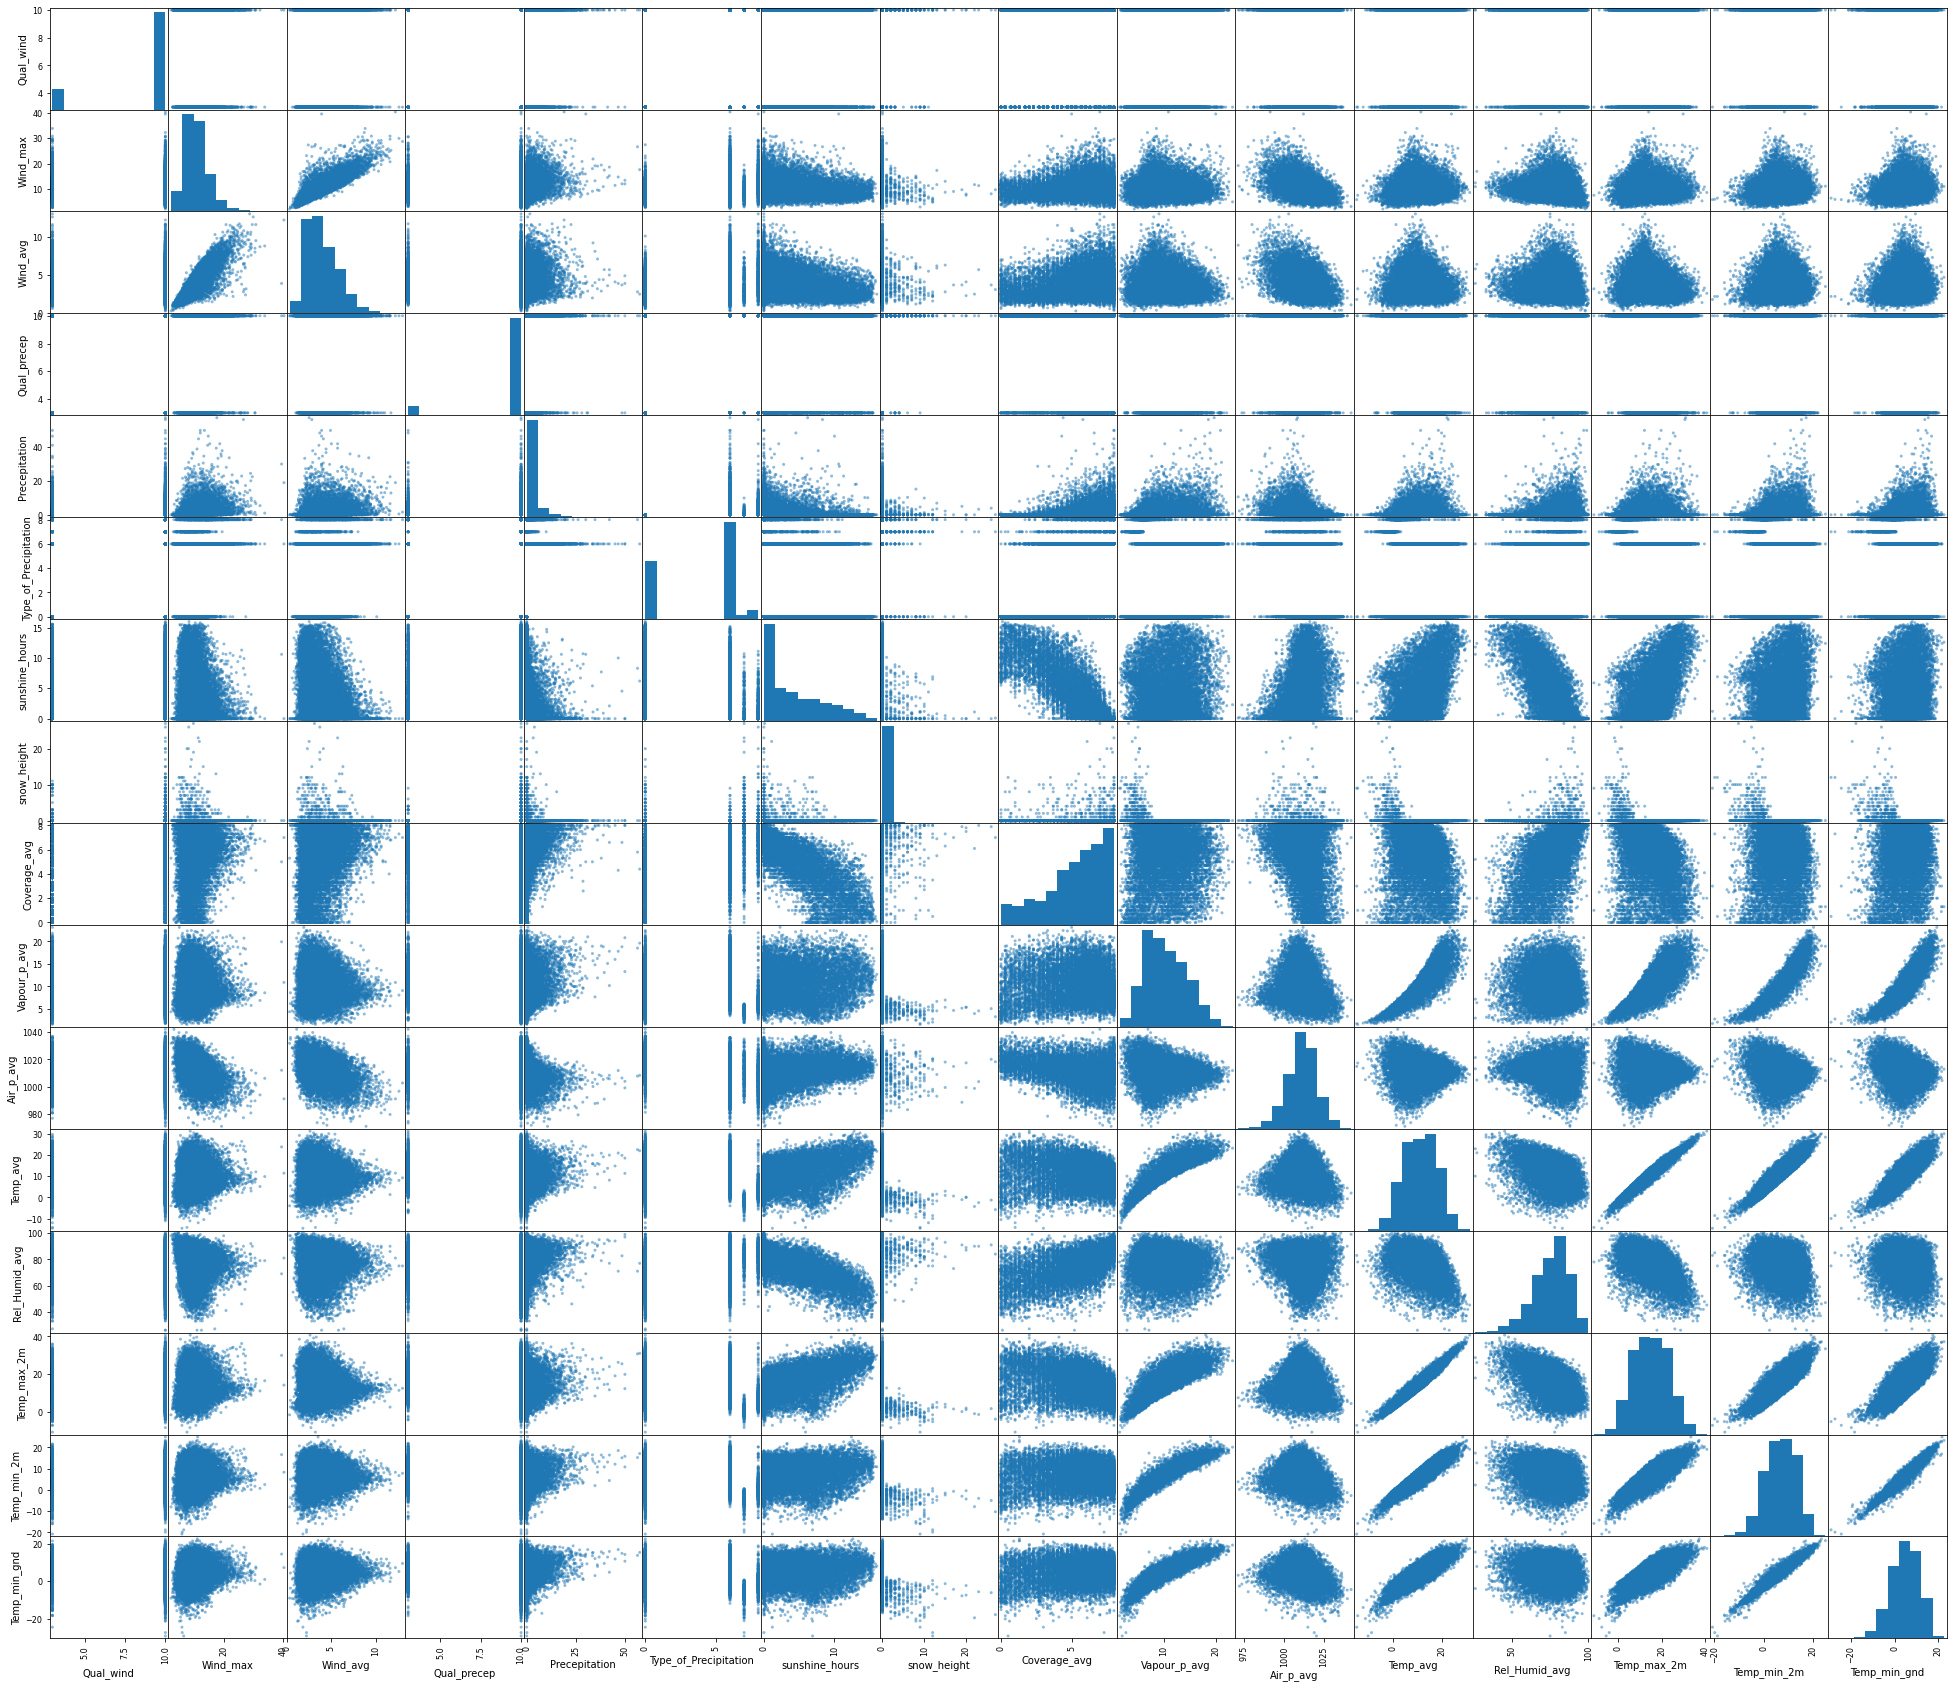

In [8]:
pd.plotting.scatter_matrix(df, figsize = (34,30))
plt.show()

_Temp_avg_, _Temp_max_2m_, _Temp_min_2m_, _Temp_min_grd_ and _Vapour_p_avg_ are certainly correlated and can be removed

also Rel_humidity and coverage seem to correlate with sunshine hours and type of precepitation
also Wind_avg seems to be correlated to Wind_max and Wind_max seems to be stronger correlated to air_p
by experience we know that the max sunshine possible is related to season but also to coverage. as they are essential I am not removing one of them

In [9]:
#df_red=df.drop(columns =['Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd', 'Vapour_p_avg', 'Wind_max'])
df_red=df.drop(columns =['Temp_max_2m', 'Temp_min_2m', 'Temp_min_gnd', 'Wind_max'])
df_red.drop(columns = ['Qual_wind', 'Qual_precep'], inplace = True)

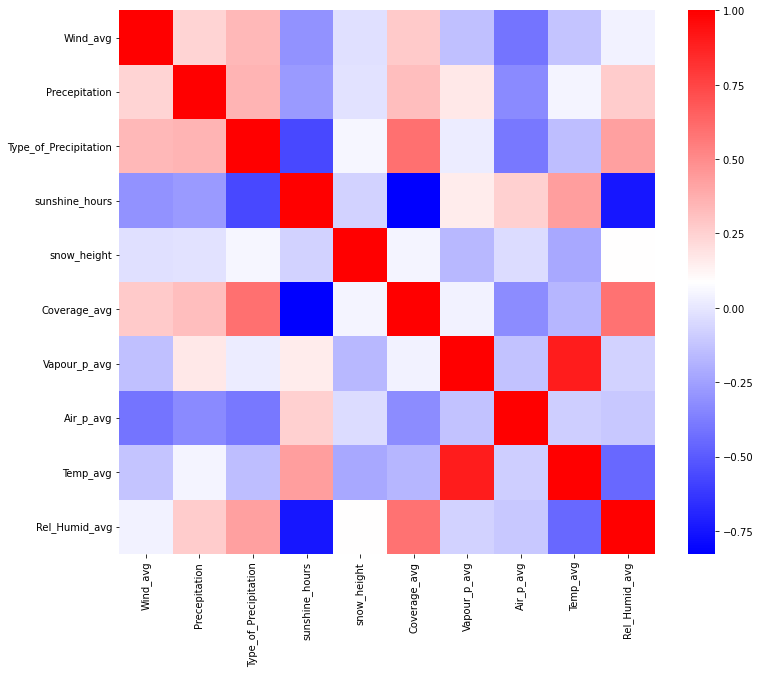

In [10]:
plt.figure(figsize=(12,10))
corr_graph = sns.heatmap(df_red.corr(), cmap = 'bwr')
plt.show()

In [11]:
df_ToP = pd.get_dummies(df['Type_of_Precipitation'])
df_ToP.head()

0  6  7  8
0  0  1  0  0
1  0  1  0  0
2  0  1  0  0
3  0  1  0  0
4  0  1  0  0

In [12]:
# The above line hot encoded the Type of precepitation to different no.
# as per documentation 6 means only rain, 7 means only snow and 8 is rain and snow, 0 is no precepitation

In [13]:
df_ToP.rename(columns = {0: 'NoRainOrSnoW', 6:'Rain', 7:'Snow',8:'RainAndSnow'}, inplace = True)

In [14]:
df_ToP.tail()

NoRainOrSnoW  Rain  Snow  RainAndSnow
11217             0     1     0            0
11218             0     1     0            0
11219             0     1     0            0
11220             0     1     0            0
11221             0     1     0            0

In [15]:
df_red.tail()

Date  Wind_avg  Precepitation  Type_of_Precipitation  \
11217  2021-12-27       5.9            1.0                      6   
11218  2021-12-28       5.8           14.9                      6   
11219  2021-12-29       5.2            6.2                      6   
11220  2021-12-30       6.5            0.1                      6   
11221  2021-12-31       5.7            0.0                      6   

       sunshine_hours  snow_height  Coverage_avg  Vapour_p_avg  Air_p_avg  \
11217           1.267            0           7.0           8.9     995.08   
11218           0.100            0           7.1          10.4     989.38   
11219           0.183            0           7.8          11.3    1001.27   
11220           0.000            0           7.6          14.2    1010.73   
11221           1.433            0           6.9          12.6    1014.87   

       Temp_avg  Rel_Humid_avg  
11217       6.5          92.00  
11218       8.7          92.58  
11219       9.7          93.67  
11220      13.6          90.83  
11221      13.3          81.92

In [16]:
df_red=df_red.join(df_ToP)
df_red.drop(columns = 'Type_of_Precipitation', inplace = True)
df_red.tail()

Date  Wind_avg  Precepitation  sunshine_hours  snow_height  \
11217  2021-12-27       5.9            1.0           1.267            0   
11218  2021-12-28       5.8           14.9           0.100            0   
11219  2021-12-29       5.2            6.2           0.183            0   
11220  2021-12-30       6.5            0.1           0.000            0   
11221  2021-12-31       5.7            0.0           1.433            0   

       Coverage_avg  Vapour_p_avg  Air_p_avg  Temp_avg  Rel_Humid_avg  \
11217           7.0           8.9     995.08       6.5          92.00   
11218           7.1          10.4     989.38       8.7          92.58   
11219           7.8          11.3    1001.27       9.7          93.67   
11220           7.6          14.2    1010.73      13.6          90.83   
11221           6.9          12.6    1014.87      13.3          81.92   

       NoRainOrSnoW  Rain  Snow  RainAndSnow  
11217             0     1     0            0  
11218             0     1     0            0  
11219             0     1     0            0  
11220             0     1     0            0  
11221             0     1     0            0

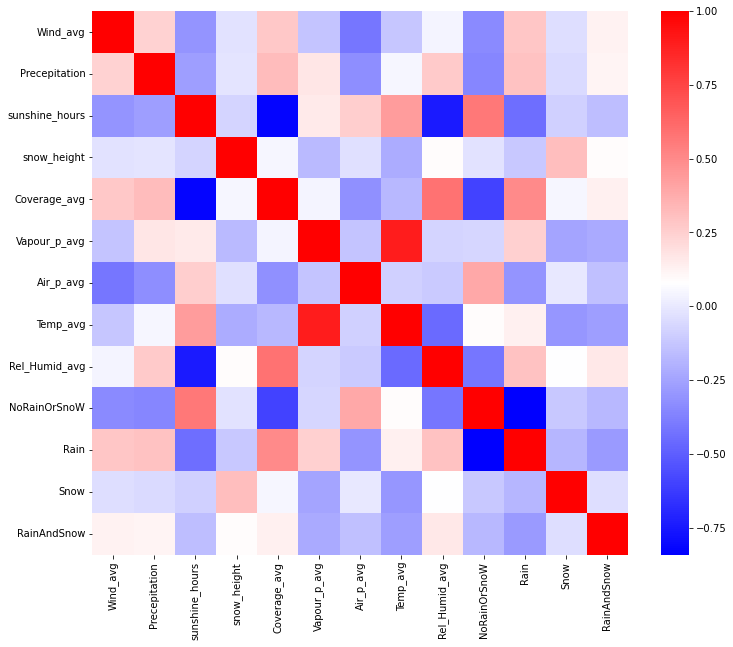

In [17]:
plt.figure(figsize=(12,10))
corr_graph = sns.heatmap(df_red.corr(), cmap = 'bwr')
plt.show()

In [18]:
#of course! When there is rain or snow, then there can't be no rain or snow, so I'll drop that columns

In [19]:
df_red.drop(columns = 'NoRainOrSnoW', inplace = True)

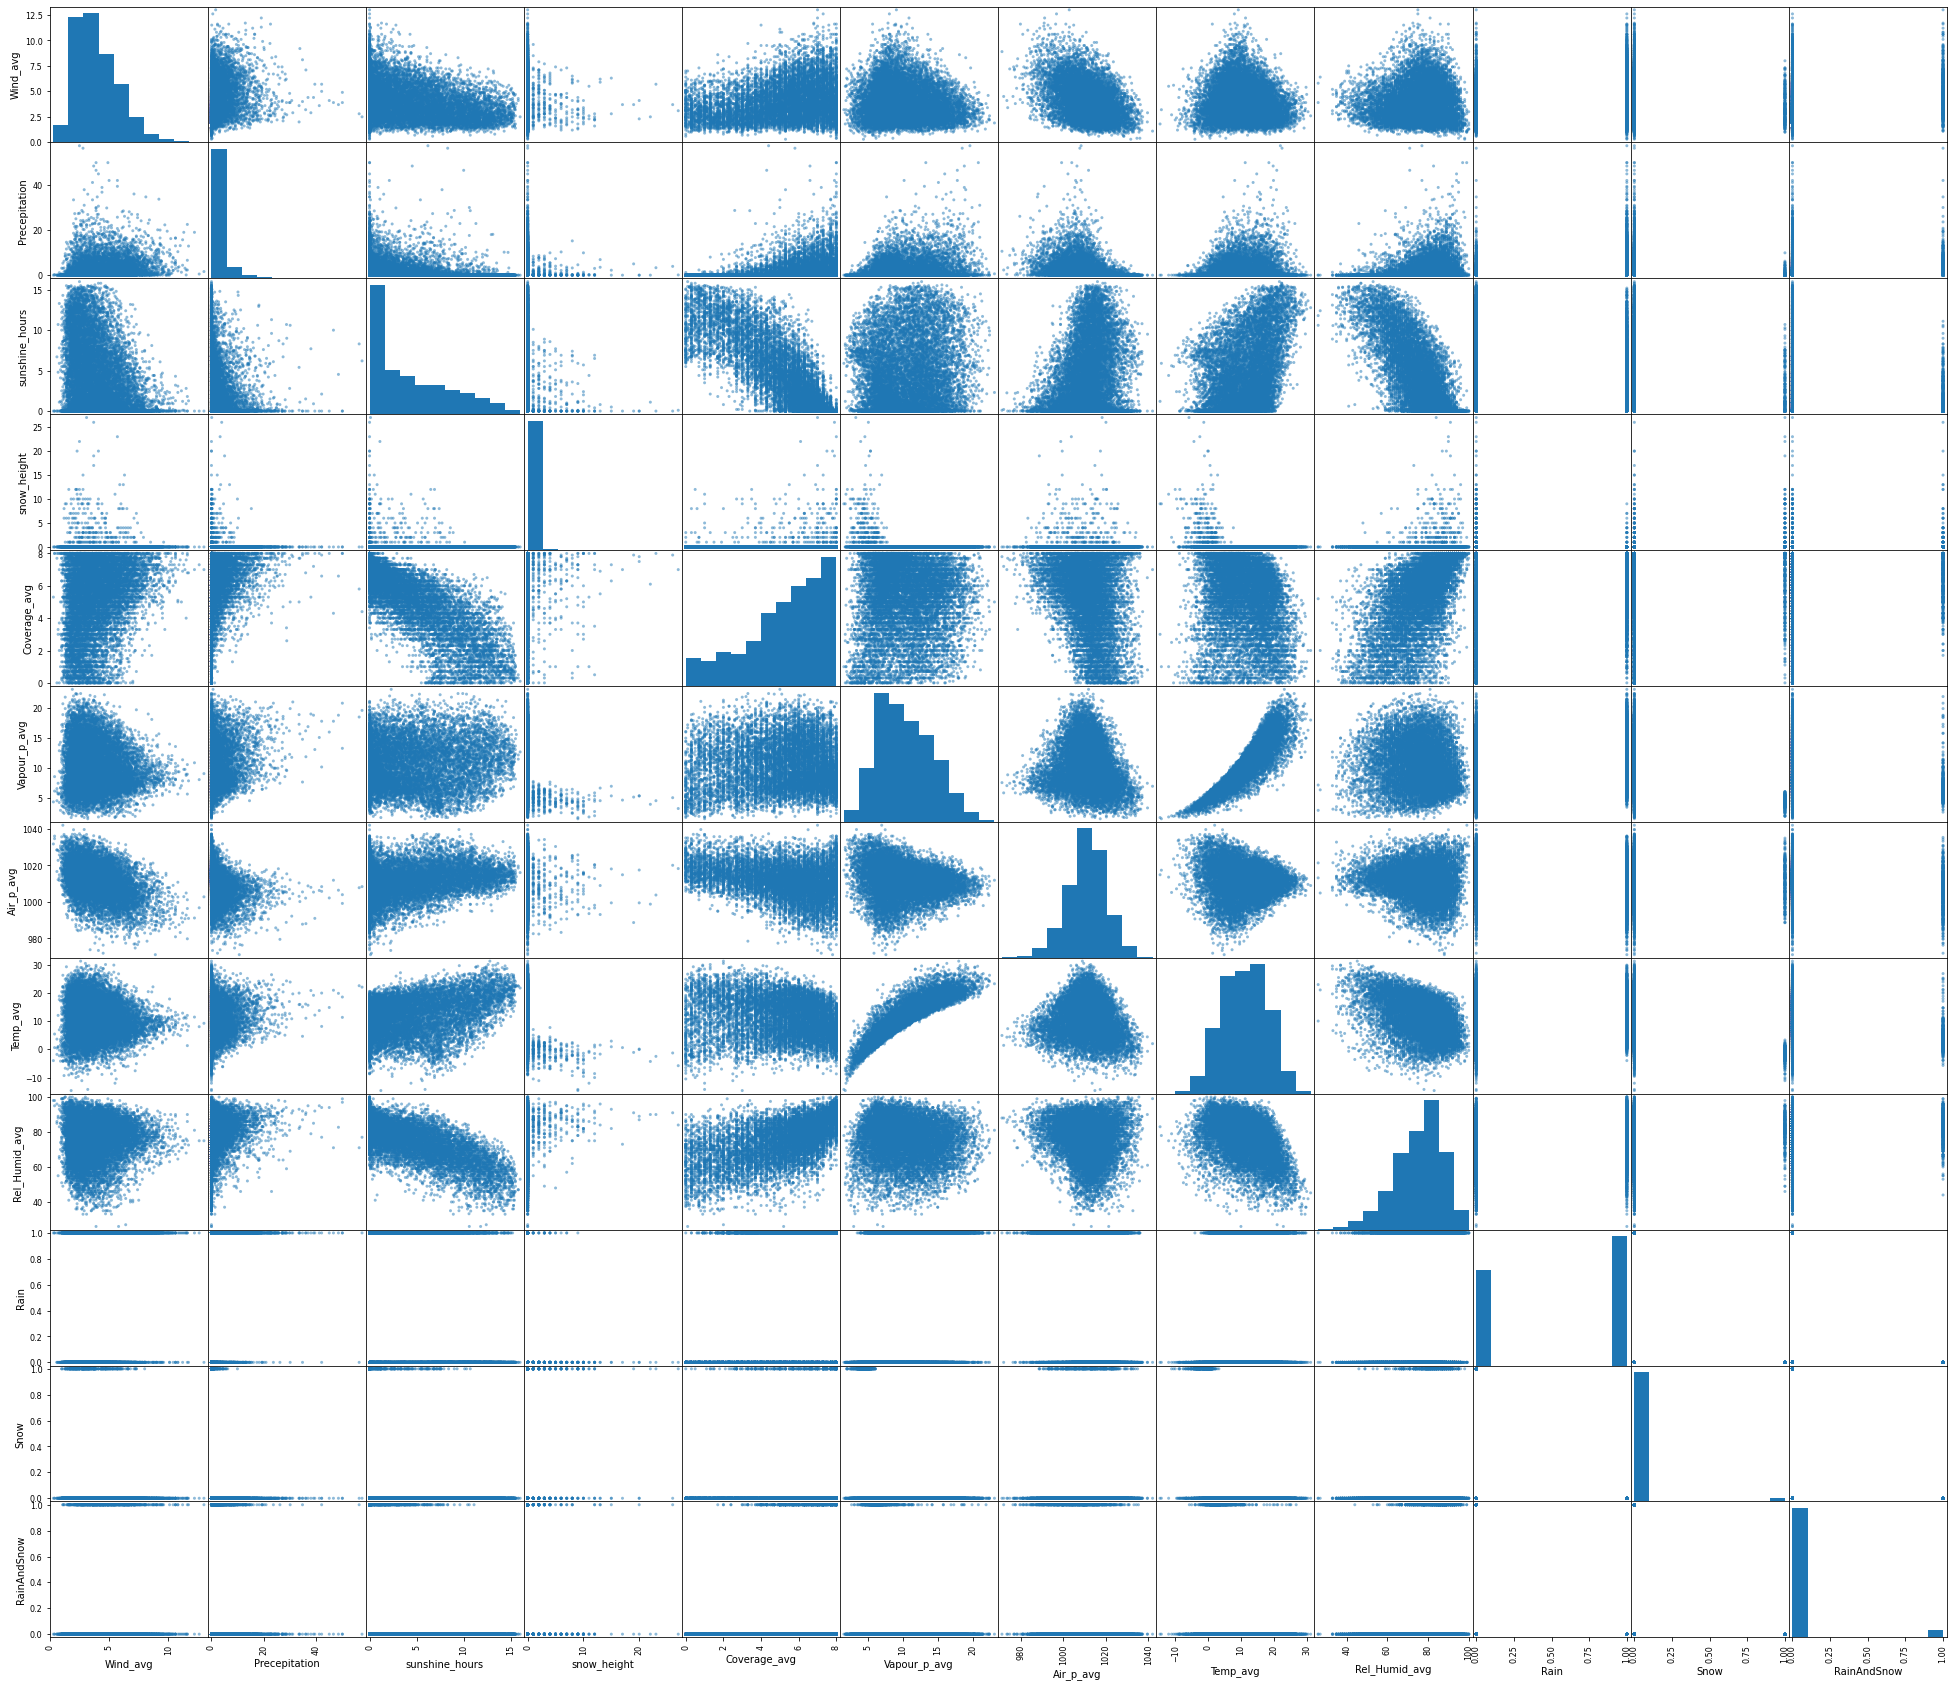

In [20]:
pd.plotting.scatter_matrix(df_red, figsize = (34,30))
plt.show()

In [21]:
df_red.to_parquet('Climate_day_train_feature.parquet')